# Vehicle Detection Project

## The goals / steps of this project are the following:

1. Perform a Histogram of Oriented Gradients (HOG) feature extraction on a labeled training set of images and train a classifier Linear SVM classifier
2. Optionally, you can also apply a color transform and append binned color features, as well as histograms of color, to your HOG feature vector.
3. Note: for those first two steps don't forget to normalize your features and randomize a selection for training and testing.
4. Implement a sliding-window technique and use your trained classifier to search for vehicles in images.
5. Run your pipeline on a video stream (start with the test_video.mp4 and later implement on full project_video.mp4) and create a heat map of recurring detections frame by frame to reject outliers and follow detected vehicles.
6. Estimate a bounding box for vehicles detected.

## Submission Includes
1. `CarND-Vehicle-Detection.ipynb` - Python Notebook which contains all the code
2. `Readme` - Project writeup explainin how the rubric pointes were addressed and also other aspects of the project
3. `Project_Output.mp4` - This contains the video output of the video. The video is also embedded in the `Readme` file as well as the `CarND-Vehicle-Detection.ipynb` notebook
5. `Project_Output_1.mp4` - This contains a second video output that was generated using information from previous frames. Although better at traking it has more false positives than the Earlier Video.
4. All the images used in the Readme File

## The project was divided into two parts

1. Training a Classifier to distinguish between car and nor car images
2. Using this classifier to distinguish identify cars in a video Stream

## HOG Features

This funciton is responsible for extracting the HOG Features. It was implemented using the `get_hog_features` in the code

It takes an image as an input and also other factors such as the colour spaces to be used, cells per block, pixels per cell as well as number of orientations to classify the image into. 

The hog parameters and how they were chosen is discussed in a cell furhter down in this writeup as well as in the Python notebook attached

## Hog Visualization
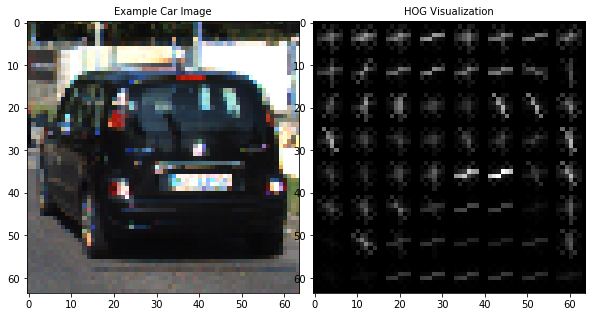

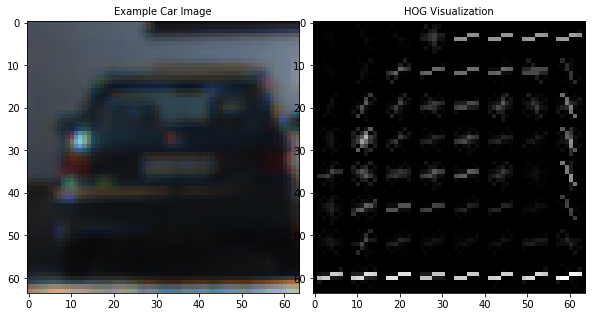

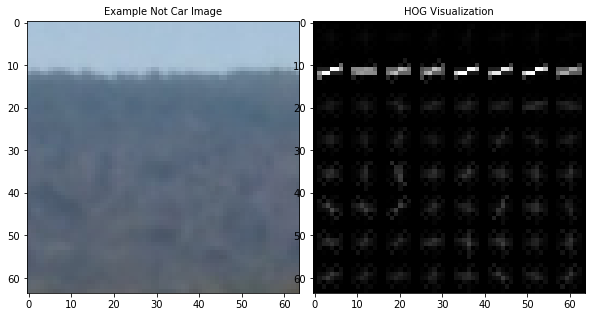

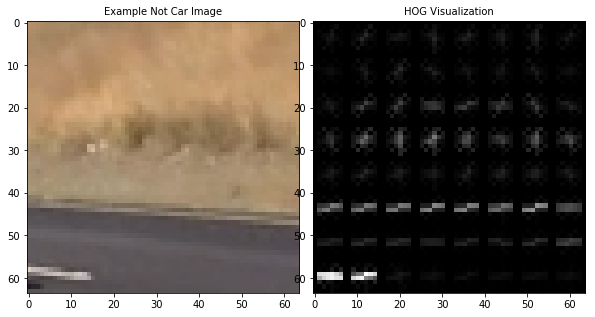

## Image preporcessing

The Extract Features funtion in the code was created to pre process the image

Different features from each image is extracted and used to make a feature vector. This feature vector is a characteristic signature of the image. 

This feature vector is then passed to a classifier which looks at signatures from car and non car images and then makes a decision on which signatures represemt which class.

This funtion does the first part - extracting feature vectors from the images

## Sliding windows

A sliding window approach is used to search for cars in different parts of the image

Characteristics from these windows will be sent to the classifier to identify cars. This has been implemented using the function `slide_window` in the code. This function along with the `draw boxes` function is used to ultimately create sldiing windows and search in them on the image. Examples and a more detailed explaination is provided furhter down.

## Find cars function

A `find_cars` function from the class was replicated. 

The only variation made from the funciton in teh class material is that I returned the rectangle coordinates. I had a lot of trouble with handling arrays and plotting in this project. But also got to learn a lot through this projeect. 

This function identifies a bounding rectangle identifying the cars in the frame

## Training the classifier

The classifier is trained in this step. The steps followed in this block are as follows:

1. Feature vectors were extracted from the images based on the earlier funcitons.
2. Labels were created for these image as cars or no cars
3. The data was split into a training set and test set
4. A scaler transform based on the training data was then applied on both the training set and the test set
5. I chose a linear SVM as my classifier, I concentrated more on trying to obtain the right feature extraction thatn the classifier choice. 
6. Different combinations for different feature extraction parameters were used. 
7. The following excel snapshot shows the different models that were trained and also the accuracy obtained from each of them. 




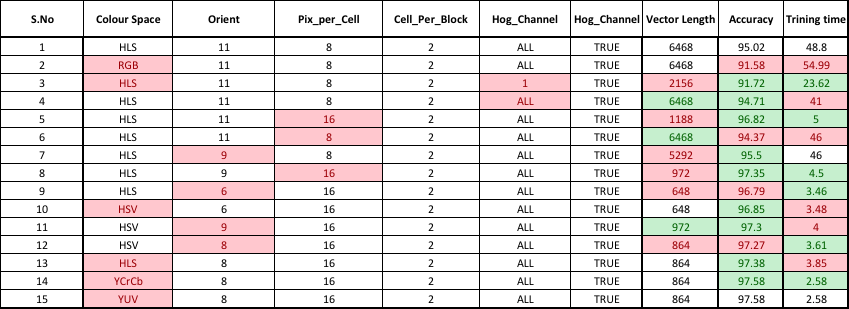



Based on this the final combination of paramters I decided to go with are as follows:

`color_space = 'YcrCb'`

`orient = 12  # HOG`

`pix_per_cell = 16`

`cell_per_block = 2`

`hog_channel = "ALL"`


`Review 2`
Added GridSearchCv to optimise the SVM Used. This improved my accuracy drastically and helped identify cars much better




The trained classifier was also tested on the test set yielding us an accuracy of about 99%

## Processing the Image through the pipeline

Next steps were to now apply the other functions and actually use teh classifier to identify cars in an image.

The steps followed were:
1. Deciding the size of the sliding window in different portions of the screen
2. Extracting the Hog Features and letting the calssifier identify cars
3. Create bounding boxes around the cars and track them as they move across the frame.

### Looking at different windows used for searching

In the following cells you will see different areas in Y where different sized boxes were used to search for images. 

Smaller boxes were used to search for cars farther away, and larger boxes were used to search ofr cars nearby.

It was also noted to not look at the part of the screen that has the trees and the sky in it. Thus our search was limited from in the Y coordinate between 400 and 700 in terms of coordinates.

Also at the same time boxes were overlapped to make sure different aspects of the cars feature were captured by different boxes. 

Further in the project we will see the concept of adding a heat map, denoting the number of boxes that have selected a particualr area as a car. Thus having overlapping boxes makes it easier to increase the heat on detected cars and be able to identify them.

### Inital Image

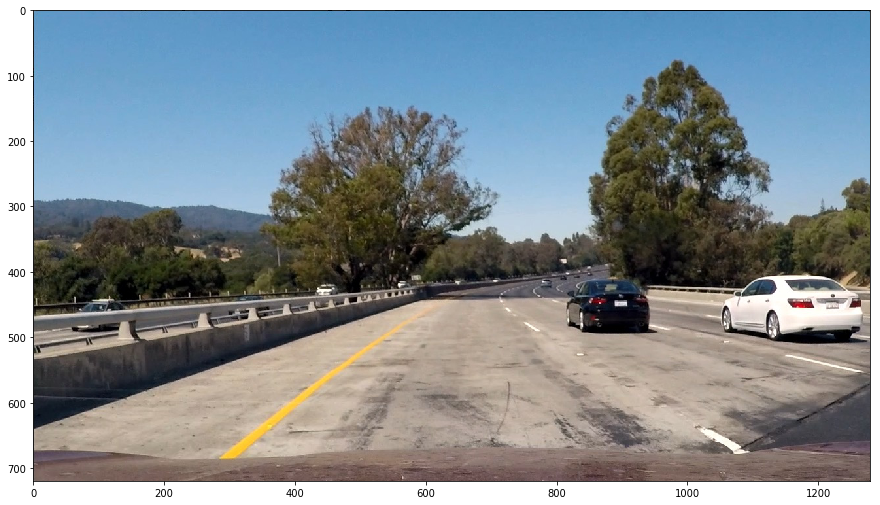

### Window 1

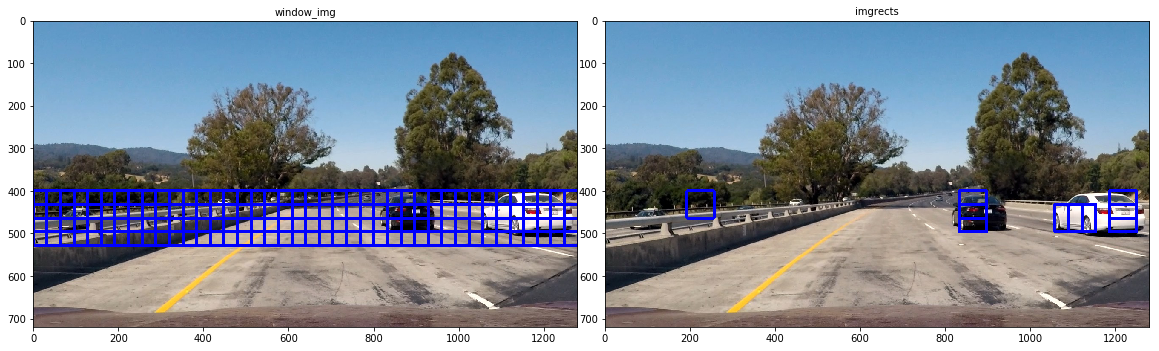

This is the smallest Window and thus is only used to search near the end of the image (end of the area where we expect to detect cars)

### Window 2

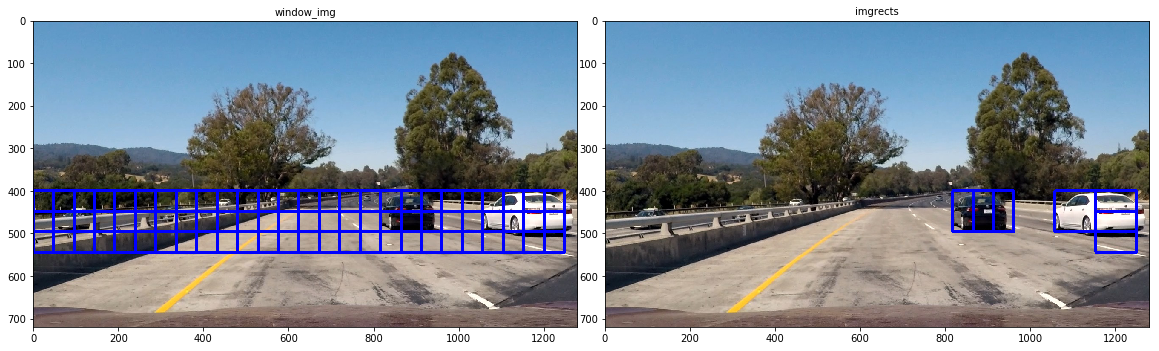

### Window 3

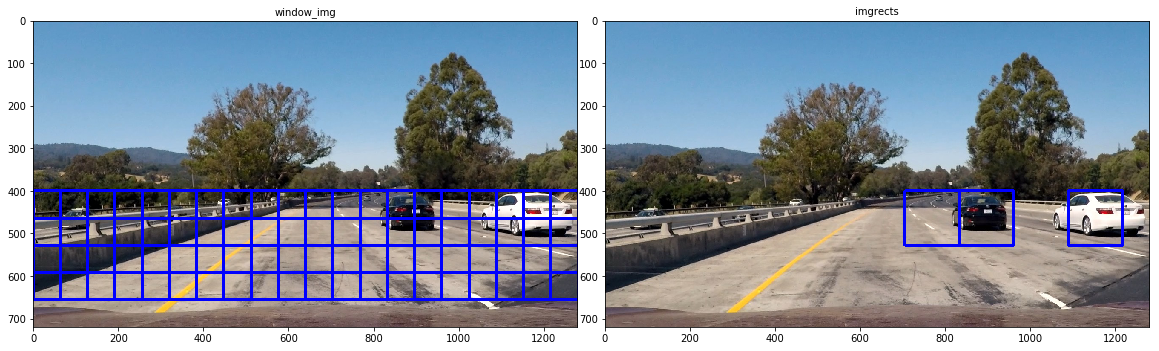

### Window 4

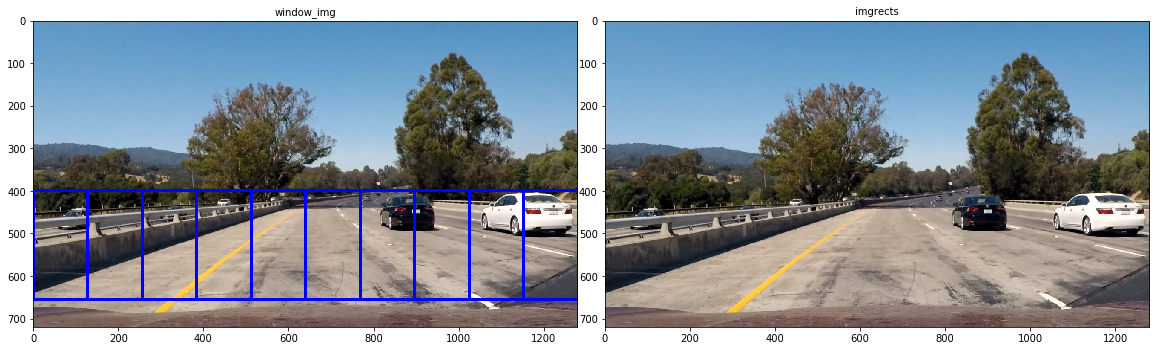

This is the largest Window adn thus only searches near the car. 

This is where teh sliding window function was used to search in different sized boxes along different Y coordinates on the image. You cna also see the classifications ont eh side showing which areas were identified as cars

### Heat Map

This funtion was used to denote a heat map based on the rectanges and their identification. This helped us define a threshold and remove a lot of false positives from our detection. 

Although a good method I was not able to completely eliminate the false positives. I am not completely satisfied with the false positive elimination but I belive give the methods used this is a pretty good result.

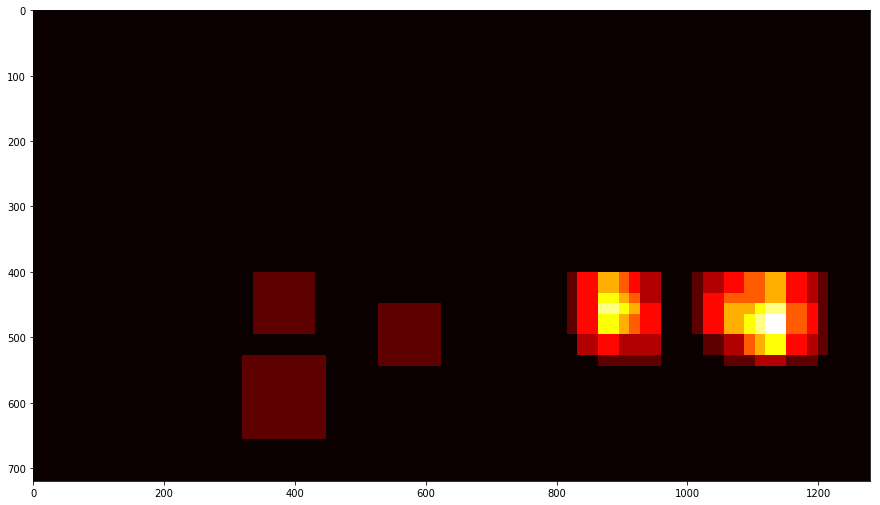

Adding Threshold to the Heat Map

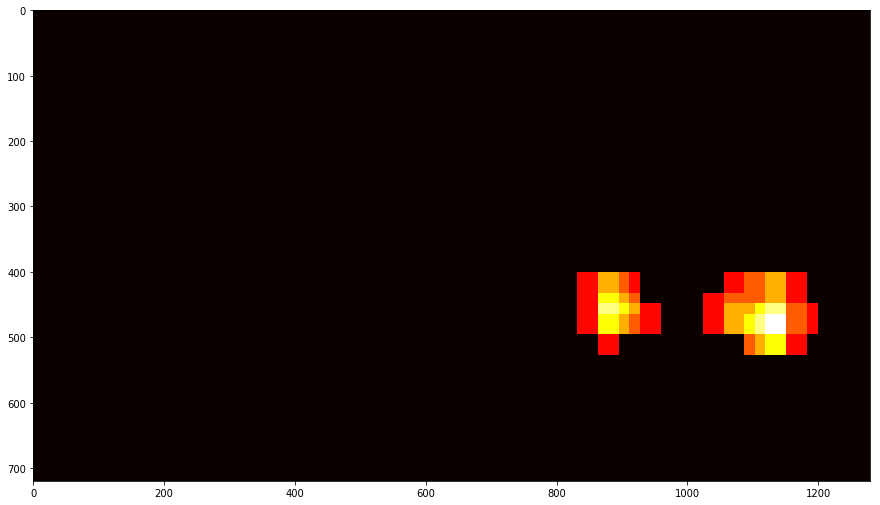

Funtion to draw boxes once the labels have been deduces

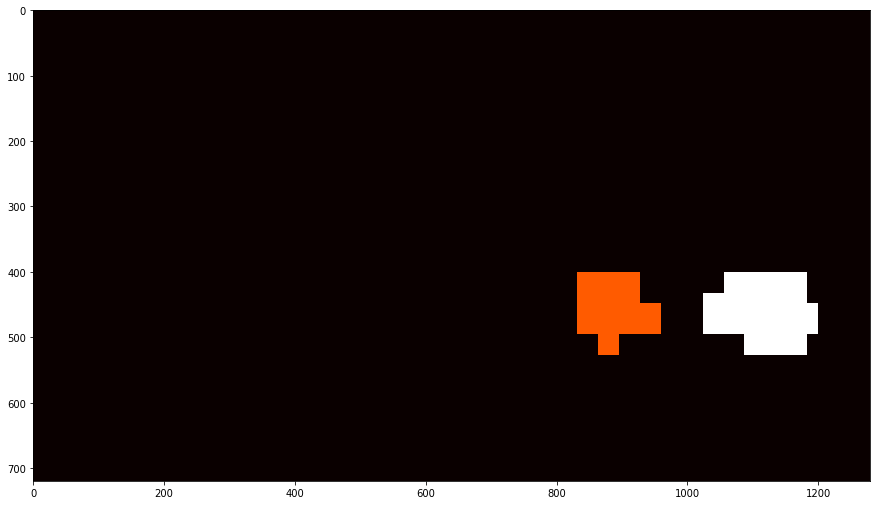


### Final Output

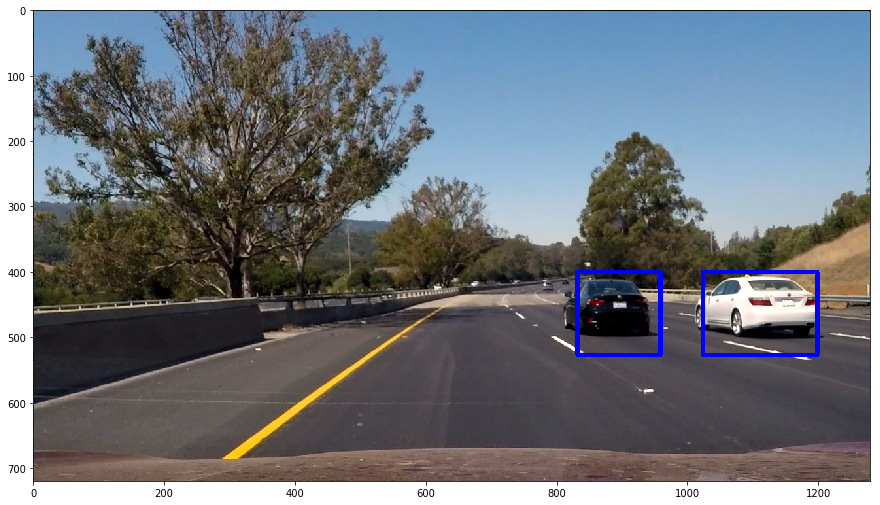

## Pipeline

This is the pipeline used for images. This is also the pipeline that has been used to show most of the images that have been Printed in the reports. It is just an aggregation of the steps we discussed aobve

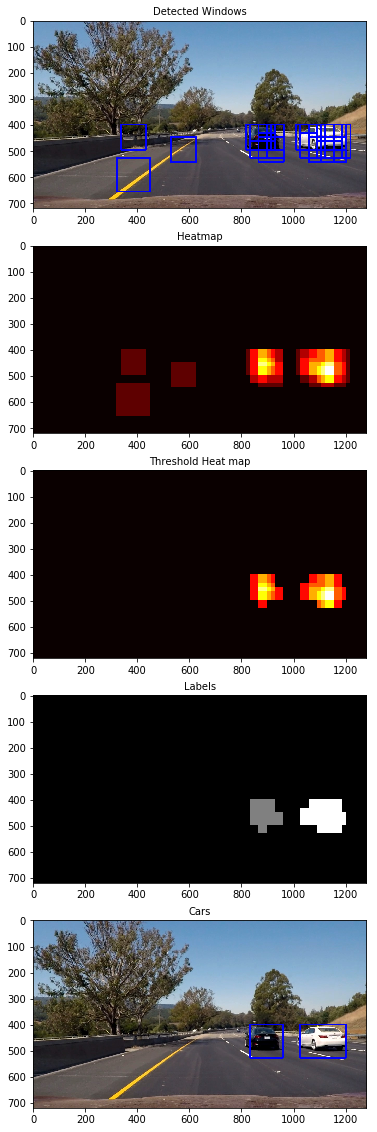

This shows an evolution of the images along the pipeline

## Video Pipeline

This pipeline only takes an image as an input and return the final image as the output. 

I did struglle with how to input the Classifier and the X_Scaler into this funtion. Considering that I cannot keep training the classifier everytime I call teh function. I was not able to identify a method but when I did remove them fromt eh argument list all functions still seemed to work. I need to look into this further but it does serve teh purpose for now.

## Video Output
Please run the next cell to view the vide detecting the cars

1. I was able to reasonable detect the position of the cars with the bounding boxes jumping around a lot but always staying in or on the car. 

2. One major issue si had was with the left yellow lane line. During the turns the calssifier was detecting it as a car and thus kept thorwing up false positives on it

3. Another area this model struggled was in the shadow when we pass unde the tree. At this point the model identifies the shadows as a car and thus leads to a few false positives.

4. Model also seemed to be more favourable in detecting Dark Coloured cars over light coloured ones. Need to explore if this could be because of a learning bias or a data bias that caused this. But the model did recognize the Black car much better tahtn teh white car.

In [1]:
#Video Output
project_output = 'project_output.mp4'
from moviepy.editor import VideoFileClip
from IPython.display import HTML

HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(project_output))

## Previous Frame information 
I tried an implementation to use information from previous frames. This improved the recognition of the cars a lot and made their bounding boxes very stable and almost always detecting cars throught the video.

But this came with its downsides with a significant increase in the numbe rof false positives. This was an area I could not explore Furhter nad hope to be able to do it sometime in the future.

`Review 2` I added the implementation to look at the previous frames and use that information to improve teh current frame detection. Although better at tracking the cars this methos did introduce more false positives that the earlier one. 

In [2]:
#Video Output
project_output = 'Vehicle_detection_tracking_final_output.mp4'
from moviepy.editor import VideoFileClip
from IPython.display import HTML

HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(project_output))

## Challenges

1. Reasonable detection of the position of the car with the bounding boxes jumping around a lot but always staying in or on the car. 
2. Lot of false positives ont he yellow lane line of the left - Also model detects the car very far away as well in teh beginnin gof the video thus marking up a huge portion of the lane line as well
3. Another area this model struggled was in the shadow when we pass under the tree. At this point the model identifies the shadows as a car and thus leads to a few false positives.
4. Very less time left for completion and thus the quality was a little bit compromised
5. Tried an implementation to use information from previous frames. This improved the recognition of the cars a lot and made their bounding boxes very stable and almost always detecting cars throught the video. But this came with its downsides with a significant increase in the number of false positives. 

## Areas of Improvement

1. Using other feature vectors as well - Colour histogram adn Spatial Features
2. Use of Information form the previous frame to improve the data in the current frame
3. Applying the pipeline to more complicated videos with more cahllenges such as shadows and bridges 